# Unit Tests on Loading Data

<img src="../img/tableshift_paper_table_1.png" alt="alt text">

In [2]:
!pip show tableshift numpy

Name: tableshift
Version: 0.1
Summary: A tabular data benchmarking toolkit.
Home-page: https://tableshift.org
Author: Josh Gardner
Author-email: jpgard@cs.washington.edu
License: 
Location: /opt/miniconda3/envs/tableshift/lib/python3.10/site-packages
Requires: category-encoders, datasets, einops, fairlearn, folktables, frozendict, h5py, hyperopt, kaggle, numpy, openpyxl, optuna, pandas, ray, rtdl, scikit-learn, tab-transformer-pytorch, tables, torch, torchinfo, torchvision, tqdm, xport
Required-by: 
---
Name: numpy
Version: 1.23.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: /opt/miniconda3/envs/tableshift/lib/python3.10/site-packages
Requires: 
Required-by: accelerate, blis, catboost, category-encoders, cmaes, contourpy, datasets, evaluate, fairlearn, fairscale, fasttext, folktables, gluonts, h5py, hyperopt, imageio, lightgbm, matplotlib, nlpaug, nptyp

In [3]:
from tableshift.core.tabular_dataset import DatasetConfig
from tableshift.configs.benchmark_configs import BENCHMARK_CONFIGS

from pathlib import Path
from rich import print as rich_print

/opt/miniconda3/envs/tableshift/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
print("[List of supported datasets]")
print(*BENCHMARK_CONFIGS.keys(), sep="\n")

[List of supported datasets]
acsfoodstamps
acsincome
acspubcov
acsunemployment
anes
brfss_blood_pressure
brfss_diabetes
diabetes_readmission
heloc
mimic_extract_los_3
mimic_extract_mort_hosp
nhanes_cholesterol
assistments
college_scorecard
nhanes_lead
physionet


## Public Health Insurance (Work in Progress)

In [ ]:
name = "acspubcov"
expt_config = BENCHMARK_CONFIGS.get(name)
rich_print(expt_config.__dict__);  # the `domain_split_varname` is the domain indicator

{
    'splitter': DomainSplitter(
        val_size=0.1,
        random_state=264738,
        id_test_size=0.1,
        domain_split_varname='DIS',
        domain_split_ood_values=['1.0'],
        domain_split_id_values=None,
        domain_split_gt_thresh=None,
        drop_domain_split_col=True,
        ood_val_size=0.1
    ),
    'grouper': Grouper(features_and_values={'RAC1P': [1], 'SEX': [1]}, drop=False, transformer=None),
    'preprocessor_config': PreprocessorConfig(
        categorical_features='one_hot',
        numeric_features='normalize',
        domain_labels='label_encode',
        passthrough_columns=None,
        dropna='rows',
        use_extended_names=False,
        map_targets=False,
        cast_targets_to_default_type=False,
        min_frequency=None,
        max_categories=None,
        n_bins=5,
        sub_illegal_chars=True
    ),
    'tabular_dataset_kwargs': {
        'acs_task': 'acspubcov',
        'name': 'acspubcov',
        'years': [2014, 2015, 2016, 2017, 2018]
    }
}

In [6]:
!pwd

/Users/hgkahng/Workspaces/domain_adaptation/tableshift/examples


In [15]:
from pathlib import Path
CACHE_DIR = Path(f"../../tmp/{name}").resolve()
print(CACHE_DIR)

/Users/hgkahng/Workspaces/domain_adaptation/tmp/acspubcov


In [16]:
from tableshift.core.tabular_dataset import DatasetConfig
dataset_config = DatasetConfig(cache_dir=CACHE_DIR)

In [17]:
rich_print(dataset_config)

DatasetConfig(
    cache_dir=PosixPath('/Users/hgkahng/Workspaces/domain_adaptation/tmp/acspubcov'),
    download=True,
    random_seed=948324
)

In [18]:
import copy
tabular_dataset_kwargs = copy.copy(expt_config.tabular_dataset_kwargs)
tabular_dataset_kwargs

{'acs_task': 'acspubcov',
 'name': 'acspubcov',
 'years': [2014, 2015, 2016, 2017, 2018]}

In [ ]:
tabular_dataset_kwargs['years'] = [2014, 2015]  # TODO: [2014, 2015, 2016, 2017, 2018]
tabular_dataset_kwargs

{'acs_task': 'acspubcov', 'name': 'acspubcov', 'years': [2014, 2015]}

In [26]:
from tableshift import get_dataset
from tableshift.core import TabularDataset

# mimic the behaviour of `get_dataset`
dset = TabularDataset(
    config=dataset_config,
    splitter=expt_config.splitter,
    grouper=expt_config.grouper,
    preprocessor_config=expt_config.preprocessor_config,
    initialize_data=True,
    **tabular_dataset_kwargs
)

/opt/miniconda3/envs/tableshift/lib/python3.10/site-packages/tableshift/core/data_source.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  year_data["ACS_YEAR"] = year


In [24]:
dset._df['DIS']

0          0
1          1
2          1
3          1
4          1
          ..
1230408    1
1230409    1
1230410    1
1230411    1
1230412    1
Name: DIS, Length: 1230413, dtype: int64

## ASSISTments

In [4]:
name = "assistments"
expt_config = BENCHMARK_CONFIGS.get(name)
rich_print(expt_config.__dict__);  # the `domain_split_varname` is the domain indicator

{
    'splitter': DomainSplitter(
        val_size=0.1,
        random_state=264738,
        id_test_size=0.1,
        domain_split_varname='school_id',
        domain_split_ood_values=[
            5040.0,
            11502.0,
            11318.0,
            11976.0,
            12421.0,
            12379.0,
            11791.0,
            8359.0,
            12406.0,
            7594.0
        ],
        domain_split_id_values=None,
        domain_split_gt_thresh=None,
        drop_domain_split_col=True,
        ood_val_size=0.1
    ),
    'grouper': None,
    'preprocessor_config': PreprocessorConfig(
        categorical_features='one_hot',
        numeric_features='normalize',
        domain_labels='label_encode',
        passthrough_columns=['skill_id', 'bottom_hint', 'first_action'],
        dropna='rows',
        use_extended_names=False,
        map_targets=False,
        cast_targets_to_default_type=False,
        min_frequency=None,
        max_categories=None,
        n_bins=5,
        sub_illegal_chars=True
    ),
    'tabular_dataset_kwargs': {}
}

In [5]:
cache_dir = Path(f"../../tmp/{name}").resolve()
print(cache_dir)

/Users/hgkahng/Workspaces/domain_adaptation/tmp/assistments


This datasets requires a Kaggle API Key.
- Login to Kaggle -> [Settings] -> API -> Create new token
- A `kaggle.json` is automatically downloaded. Place it as: ~/.kaggle/kaggle.json

In [6]:
from tableshift import get_dataset
dset = get_dataset(name=name, cache_dir=cache_dir)

skillbuilder-data-2009-2010.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
dset._df.shape

(2667776, 28)

In [8]:
dset._df.columns

Index(['hint_count', 'attempt_count', 'ms_first_response', 'position',
       'overlap_time', 'Average_confidence(FRUSTRATED)',
       'Average_confidence(CONFUSED)', 'Average_confidence(CONCENTRATING)',
       'Average_confidence(BORED)', 'problem_type_algebra',
       'problem_type_fill_in_1', 'problem_type_choose_1',
       'problem_type_choose_n', 'problem_type_rank',
       'problem_type_open_response', 'tutor_mode_tutor', 'type_LinearSection',
       'type_MasterySection', 'type_RandomChildOrderSection',
       'type_RandomIterateSection', 'type_PlacementsSection',
       'type_ChooseConditionSection', 'type_NumericLimitSection', 'correct',
       'bottom_hint', 'skill_id', 'school_id', 'first_action'],
      dtype='object')

In [12]:
dset._df['school_id'].unique().__len__()

401

In [20]:
X_tr, y_tr, _, d_tr = dset.get_pandas(split='train')  # ['train', 'validation', 'id_test', 'ood_test', 'ood_validation']

In [ ]:
d_tr.value_counts()  # 

45     240962
49     158871
106     92205
17      79432
1       78659
        ...  
378         1
314         1
383         1
398         1
267         1
Name: school_id, Length: 386, dtype: int64

In [21]:
X_tr.shape

(2132526, 26)

## College Scorecard

In [25]:
name = "college_scorecard"
expt_config = BENCHMARK_CONFIGS.get(name)
rich_print(expt_config.__dict__);  # the `domain_split_varname` is the domain indicator

{
    'splitter': DomainSplitter(
        val_size=0.1,
        random_state=264738,
        id_test_size=0.1,
        domain_split_varname='CCBASIC',
        domain_split_ood_values=[
            'Special Focus Institutions--Other special-focus institutions',
            'Special Focus Institutions--Theological seminaries, Bible colleges, and other faith-related 
institutions',
            "Associate's--Private For-profit 4-year Primarily Associate's",
            'Baccalaureate Colleges--Diverse Fields',
            'Special Focus Institutions--Schools of art, music, and design',
            "Associate's--Private Not-for-profit",
            "Baccalaureate/Associate's Colleges",
            "Master's Colleges and Universities (larger programs)"
        ],
        domain_split_id_values=None,
        domain_split_gt_thresh=None,
        drop_domain_split_col=True,
        ood_val_size=0.1
    ),
    'grouper': None,
    'preprocessor_config': PreprocessorConfig(
        categorical_features='label_encode',
        numeric_features='kbins',
        domain_labels='label_encode',
        passthrough_columns=None,
        dropna=None,
        use_extended_names=False,
        map_targets=False,
        cast_targets_to_default_type=False,
        min_frequency=None,
        max_categories=None,
        n_bins=100,
        sub_illegal_chars=True
    ),
    'tabular_dataset_kwargs': {}
}

In [26]:
cache_dir = Path(f"../../tmp/{name}").resolve()
print(cache_dir)

/Users/hgkahng/Workspaces/domain_adaptation/tmp/college_scorecard


This dataset also requires a Kaggle API key.

In [ ]:
# This raises a warning that bins are too small.
# TODO: consider decreasing the number of bins `n_bins` in PreprocessorConfig

from tableshift import get_dataset
dset = get_dataset(name=name, cache_dir=cache_dir)

In [28]:
dset._df.shape

(124699, 120)

In [29]:
X_tr, y_tr, _, d_tr = dset.get_pandas(split='train')

In [30]:
X_tr.shape

(98556, 118)

In [31]:
y_tr.shape

(98556,)

In [ ]:
d_tr.unique().__len__()  # 26 unique training domains

26

In [34]:
X_te, y_te, _, d_te = dset.get_pandas(split='ood_test')

In [ ]:
d_te.unique().__len__()  # 8 testing domains

8

## Childhood Lead (Work in Progress)
- - The library `xport` fails to load `.xpt` files.

In [4]:
name = "nhanes_lead"
expt_config = BENCHMARK_CONFIGS.get(name)
rich_print(expt_config.__dict__);  # the `domain_split_varname` is the domain indicator

{
    'splitter': DomainSplitter(
        val_size=0.1,
        random_state=264738,
        id_test_size=0.1,
        domain_split_varname='INDFMPIRBelowCutoff',
        domain_split_ood_values=[1.0],
        domain_split_id_values=None,
        domain_split_gt_thresh=None,
        drop_domain_split_col=True,
        ood_val_size=0.1
    ),
    'grouper': Grouper(
        features_and_values={'RIDRETH_merged': [3], 'RIAGENDR': ['1.0']},
        drop=False,
        transformer=None
    ),
    'preprocessor_config': PreprocessorConfig(
        categorical_features='one_hot',
        numeric_features='kbins',
        domain_labels='label_encode',
        passthrough_columns=['nhanes_year'],
        dropna='rows',
        use_extended_names=False,
        map_targets=False,
        cast_targets_to_default_type=False,
        min_frequency=None,
        max_categories=None,
        n_bins=5,
        sub_illegal_chars=True
    ),
    'tabular_dataset_kwargs': {
        'nhanes_task': 'lead',
        'years': [1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017]
    }
}

In [5]:
cache_dir = Path(f"../../tmp/{name}").resolve()
print(cache_dir)

/Users/hgkahng/Workspaces/domain_adaptation/tmp/nhanes_lead


In [6]:
from tableshift import get_dataset
dset = get_dataset(name=name, cache_dir=cache_dir)

ERROR:xport.v56:Document begins with
b'<!DOCTYPE html>\r\n<html lang="en-us" class="cdc-2022 theme-blue cdc-root-home hom'
b'e-2022 cdc-page-type-2022home cdc-tp5" >\r\n<head>\r\n\t<title>Page Not Found | CDC</'
b'title>\r\n\t<meta name="description" content="Page Not Found | CDC" />\r\n\t<meta name'
b'="date" content="2024-05-02T11:44:27.140Z">\r\n\r\n\t<meta charset="UTF-8" />\r\n\t<meta'
b' http-equiv="X-UA-Compatible" content="IE=Edge" />\r\n\t<meta content="width=device'
b'-width, initial-scale=1, shrink-to-fit=no" name="viewport" />\r\n\t<meta name="mobi'
b'le-web-app-capable" content="yes" />\r\n\t<meta name="apple-mobile-web-app-capable"'
b' content="yes" />\r\n\t<link rel="apple-touch-icon" sizes="180x180" href="/Template'


ValueError: Document does not match SAS Version 5 or 6 Transport (XPORT) format

## Diabetes (Work in Progress)
- The library `xport` fails to load `.xpt` files.

In [8]:
name = "brfss_diabetes"
expt_config = BENCHMARK_CONFIGS.get(name)
rich_print(expt_config.__dict__);  # the `domain_split_varname` is the domain indicator

{
    'splitter': DomainSplitter(
        val_size=0.1,
        random_state=264738,
        id_test_size=0.1,
        domain_split_varname='PRACE1',
        domain_split_ood_values=[2, 3, 4, 5, 6],
        domain_split_id_values=[1],
        domain_split_gt_thresh=None,
        drop_domain_split_col=True,
        ood_val_size=0.1
    ),
    'grouper': Grouper(features_and_values={'SEX': [1]}, drop=False, transformer=None),
    'preprocessor_config': PreprocessorConfig(
        categorical_features='one_hot',
        numeric_features='normalize',
        domain_labels='label_encode',
        passthrough_columns=['IYEAR'],
        dropna='rows',
        use_extended_names=False,
        map_targets=False,
        cast_targets_to_default_type=False,
        min_frequency=None,
        max_categories=None,
        n_bins=5,
        sub_illegal_chars=True
    ),
    'tabular_dataset_kwargs': {'name': 'brfss_diabetes', 'task': 'diabetes', 'years': (2015, 2017, 2019, 2021)}
}

In [9]:
cache_dir = Path(f"../../tmp/{name}").resolve()
print(cache_dir)

/Users/hgkahng/Workspaces/domain_adaptation/tmp/brfss_diabetes


In [10]:
from tableshift import get_dataset
dset = get_dataset(name=name, cache_dir=cache_dir)

ERROR:xport.v56:Document begins with
b'HEADER RECORD*******LIBRARY HEADER RECORD!!!!!!!000000000000000000000000000000  '
b'SAS     SAS     SASLIB  9.3     W32_7PRO                        23AUG16:12:51:21'
b'23AUG16:12:51:21                                                                '
b'HEADER RECORD*******MEMBER  HEADER RECORD!!!!!!!000000000000000001600000000140  '
b'HEADER RECORD*******DSCRPTR HEADER RECORD!!!!!!!000000000000000000000000000000  '
b'SAS     LLCP2015SASDATA 9.3     W32_7PRO                        23AUG16:12:51:21'
b'23AUG16:12:51:21                                                                '
b'HEADER RECORD*******NAMESTR HEADER RECORD!!!!!!!000000033000000000000000000000  '


ValueError: Document does not match SAS Version 5 or 6 Transport (XPORT) format

## Food Stamps

In [11]:
name = "acsfoodstamps"
expt_config = BENCHMARK_CONFIGS.get(name)
rich_print(expt_config.__dict__);  # the `domain_split_varname` is the domain indicator

{
    'splitter': DomainSplitter(
        val_size=0.1,
        random_state=264738,
        id_test_size=0.1,
        domain_split_varname='DIVISION',
        domain_split_ood_values=['06'],
        domain_split_id_values=None,
        domain_split_gt_thresh=None,
        drop_domain_split_col=True,
        ood_val_size=0.1
    ),
    'grouper': Grouper(features_and_values={'RAC1P': [1], 'SEX': [1]}, drop=False, transformer=None),
    'preprocessor_config': PreprocessorConfig(
        categorical_features='one_hot',
        numeric_features='normalize',
        domain_labels='label_encode',
        passthrough_columns=None,
        dropna='rows',
        use_extended_names=False,
        map_targets=False,
        cast_targets_to_default_type=False,
        min_frequency=None,
        max_categories=None,
        n_bins=5,
        sub_illegal_chars=True
    ),
    'tabular_dataset_kwargs': {'acs_task': 'acsfoodstamps'}
}

In [12]:
cache_dir = Path(f"../../tmp/{name}").resolve()
print(cache_dir)

/Users/hgkahng/Workspaces/domain_adaptation/tmp/acsfoodstamps


In [13]:
from tableshift import get_dataset
dset = get_dataset(name=name, cache_dir=cache_dir)

/opt/miniconda3/envs/tableshift/lib/python3.10/site-packages/tableshift/core/data_source.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  year_data["ACS_YEAR"] = year


In [14]:
dset._df.shape

(840582, 241)

In [16]:
dset._df.columns.__len__()

241

In [17]:
X_tr, y_tr, G_tr, d_tr = dset.get_pandas(split='train')

In [18]:
X_tr.shape

(629018, 239)

In [19]:
y_tr.shape

(629018,)

In [20]:
d_tr.unique().__len__()

9

In [21]:
G_tr

,RAC1P,SEX
110337,0,1
135608,1,1
749395,0,0
211358,1,0
706794,1,0
...,...,...
32554,0,0
73580,0,0
57197,1,1
94281,0,0


In [22]:
X_te, y_te, G_te, d_te = dset.get_pandas(split="ood_test")

In [23]:
X_te.shape

(48878, 239)

In [ ]:
d_te.unique().__len__()  # one ood domain

1

## Hospital Readmission

In [25]:
name = "diabetes_readmission"
expt_config = BENCHMARK_CONFIGS.get(name)
rich_print(expt_config.__dict__);  # the `domain_split_varname` is the domain indicator

{
    'splitter': DomainSplitter(
        val_size=0.1,
        random_state=264738,
        id_test_size=0.1,
        domain_split_varname='admission_source_id',
        domain_split_ood_values=[7],
        domain_split_id_values=None,
        domain_split_gt_thresh=None,
        drop_domain_split_col=True,
        ood_val_size=0.1
    ),
    'grouper': Grouper(
        features_and_values={'race': ['Caucasian'], 'gender': ['Male']},
        drop=False,
        transformer=None
    ),
    'preprocessor_config': PreprocessorConfig(
        categorical_features='one_hot',
        numeric_features='normalize',
        domain_labels='label_encode',
        passthrough_columns=None,
        dropna='rows',
        use_extended_names=False,
        map_targets=False,
        cast_targets_to_default_type=False,
        min_frequency=0.01,
        max_categories=None,
        n_bins=5,
        sub_illegal_chars=True
    ),
    'tabular_dataset_kwargs': {}
}

In [26]:
cache_dir = Path(f"../../tmp/{name}").resolve()
print(cache_dir)

/Users/hgkahng/Workspaces/domain_adaptation/tmp/diabetes_readmission


In [27]:
from tableshift import get_dataset
dset = get_dataset(name=name, cache_dir=cache_dir)

In [45]:
'admission_source_id' in dset._df.columns  # TODO: we need to drop this ...

True

In [28]:
dset._df.shape

(99493, 185)

<Axes: >

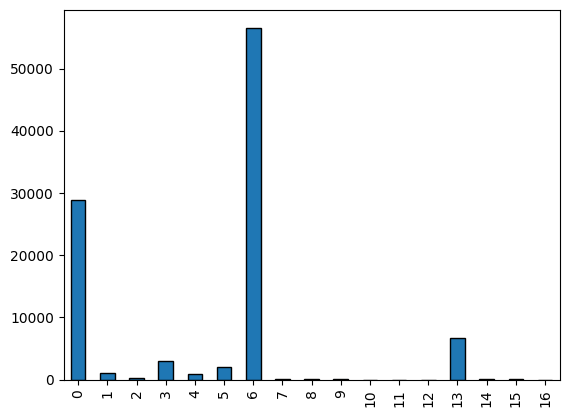

In [34]:
dset._df['admission_source_id'].value_counts().sort_index().plot(kind='bar', edgecolor='k')

In [35]:
X_tr, y_tr, G_tr, d_tr = dset.get_pandas(split="train")

In [36]:
X_tr.shape

(34288, 183)

In [38]:
G_tr  # race, gener

,race,gender
6401,1,1
7204,1,1
51101,1,1
67951,1,1
41566,0,1
...,...,...
13553,1,1
14010,1,1
34431,1,0
28832,1,0


In [41]:
d_tr.unique().__len__()

15

In [42]:
X_te, y_te, G_te, d_te = dset.get_pandas(split="ood_test")

In [43]:
X_te.shape

(50968, 183)

In [46]:
d_te.unique().__len__()

1

## Income

In [47]:
name = "acsincome"
expt_config = BENCHMARK_CONFIGS.get(name)
rich_print(expt_config.__dict__);  # the `domain_split_varname` is the domain indicator

{
    'splitter': DomainSplitter(
        val_size=0.1,
        random_state=264738,
        id_test_size=0.1,
        domain_split_varname='DIVISION',
        domain_split_ood_values=['01'],
        domain_split_id_values=None,
        domain_split_gt_thresh=None,
        drop_domain_split_col=True,
        ood_val_size=0.1
    ),
    'grouper': Grouper(features_and_values={'RAC1P': [1], 'SEX': [1]}, drop=False, transformer=None),
    'preprocessor_config': PreprocessorConfig(
        categorical_features='one_hot',
        numeric_features='normalize',
        domain_labels='label_encode',
        passthrough_columns=None,
        dropna='rows',
        use_extended_names=False,
        map_targets=False,
        cast_targets_to_default_type=False,
        min_frequency=None,
        max_categories=None,
        n_bins=5,
        sub_illegal_chars=True
    ),
    'tabular_dataset_kwargs': {'acs_task': 'acsincome'}
}

In [48]:
cache_dir = Path(f"../../tmp/{name}").resolve()
print(cache_dir)

/Users/hgkahng/Workspaces/domain_adaptation/tmp/acsincome


In [49]:
from tableshift import get_dataset
dset = get_dataset(name=name, cache_dir=cache_dir)

/opt/miniconda3/envs/tableshift/lib/python3.10/site-packages/tableshift/core/data_source.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  year_data["ACS_YEAR"] = year


In [50]:
dset._df.shape

(1664500, 234)

In [ ]:
"DIVISION" in dset._df.columns  # TODO: Drop this later

True

<Axes: >

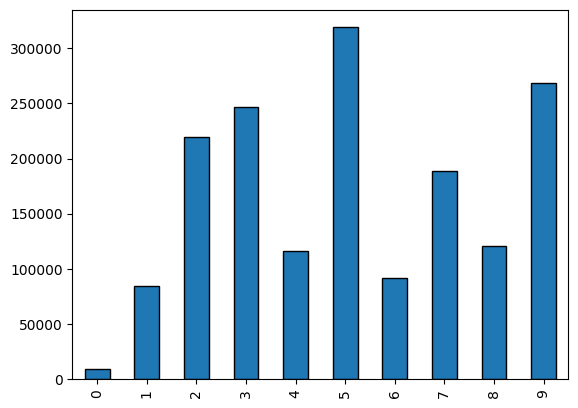

In [53]:
dset._df['DIVISION'].value_counts().sort_index().plot(kind='bar', edgecolor='k')

In [54]:
X_tr, y_tr, G_tr, d_tr = dset.get_pandas(split='train')

In [55]:
X_tr.shape

(1264123, 232)

In [58]:
y_tr.unique()

array([0., 1.])

In [59]:
G_tr

,RAC1P,SEX
1389235,1,0
644153,1,0
1134403,1,0
1277484,1,0
997142,1,1
...,...,...
1142189,1,0
1183215,1,0
43389,0,0
1203916,1,0


In [60]:
d_tr.unique().__len__()

9

In [61]:
X_te, y_te, G_te, d_te = dset.get_pandas(split='ood_test')

In [62]:
X_te.shape

(75911, 232)

In [63]:
y_te.unique()

array([0., 1.])

In [64]:
G_te

,RAC1P,SEX
910298,1,0
311286,1,1
1299972,1,0
722716,1,1
314653,1,0
...,...,...
318737,1,0
741617,0,1
725234,1,0
1305569,1,1


In [65]:
d_te.unique()

array([1])

## Sepsis

In [5]:
name = "physionet"
expt_config = BENCHMARK_CONFIGS.get(name)
rich_print(expt_config.__dict__);  # the `domain_split_varname` is the domain indicator

{
    'splitter': DomainSplitter(
        val_size=0.1,
        random_state=264738,
        id_test_size=0.1,
        domain_split_varname='ICULOS',
        domain_split_ood_values=None,
        domain_split_id_values=None,
        domain_split_gt_thresh=47.0,
        drop_domain_split_col=True,
        ood_val_size=0.1
    ),
    'grouper': None,
    'preprocessor_config': PreprocessorConfig(
        categorical_features='one_hot',
        numeric_features='kbins',
        domain_labels='label_encode',
        passthrough_columns=None,
        dropna=None,
        use_extended_names=False,
        map_targets=False,
        cast_targets_to_default_type=False,
        min_frequency=None,
        max_categories=None,
        n_bins=5,
        sub_illegal_chars=True
    ),
    'tabular_dataset_kwargs': {'name': 'physionet'}
}

In [6]:
cache_dir = Path(f"../../tmp/{name}").resolve()
print(cache_dir)

/Users/hgkahng/Workspaces/domain_adaptation/tmp/physionet


In [8]:
from tableshift import get_dataset
dset = get_dataset(name=name, cache_dir=cache_dir, )

/bin/sh: wget: command not found


ValueError: No objects to concatenate

name = "acsincome"
expt_config = BENCHMARK_CONFIGS.get(name)
rich_print(expt_config.__dict__);  # the `domain_split_varname` is the domain indicator